Exploring Visualizations

There are several different libraries that are available for data visualization. Create some visualizations using the Pumpkin data in this lesson with matplotlib and seaborn in a sample notebook. Which libraries are easier to work with?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
# load data
pumpkins = pd.read_csv('../../US-pumpkins.csv')
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [17]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.isna().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [18]:
new_cols = ['Month','Package','Low Price','High Price','Date']
pumpkins = pumpkins.drop([col for col in pumpkins.columns if col not in new_cols],axis=1)
pumpkins

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0


In [19]:
# Extracting Average Price and month data
price = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month


In [20]:
new_pumpkins = pd.DataFrame({'Month':month,'Package':pumpkins['Package'],'High Price':pumpkins['High Price'],'Low Price':pumpkins['High Price'],'Price':price})
new_pumpkins

,Month,Package,High Price,Low Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.000
71,9,1 1/9 bushel cartons,18.0,18.0,18.000
72,10,1 1/9 bushel cartons,18.0,18.0,18.000
73,10,1 1/9 bushel cartons,17.0,17.0,17.000
74,10,1 1/9 bushel cartons,15.0,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.0,15.0,15.000
1739,9,1/2 bushel cartons,15.0,15.0,14.375
1740,9,1/2 bushel cartons,15.0,15.0,12.875
1741,9,1/2 bushel cartons,12.0,12.0,12.000


In [21]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins

,Month,Package,High Price,Low Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.50
71,9,1 1/9 bushel cartons,18.0,18.0,16.20
72,10,1 1/9 bushel cartons,18.0,18.0,16.20
73,10,1 1/9 bushel cartons,17.0,17.0,15.30
74,10,1 1/9 bushel cartons,15.0,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.0,15.0,30.00
1739,9,1/2 bushel cartons,15.0,15.0,28.75
1740,9,1/2 bushel cartons,15.0,15.0,25.75
1741,9,1/2 bushel cartons,12.0,12.0,24.00


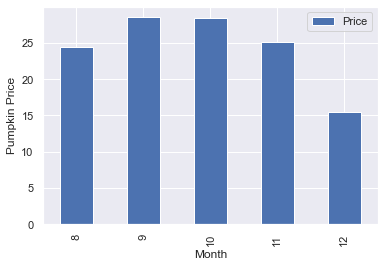

In [22]:
import seaborn as sns
sns.set()
plt.figure()
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')
plt.legend()
plt.show()


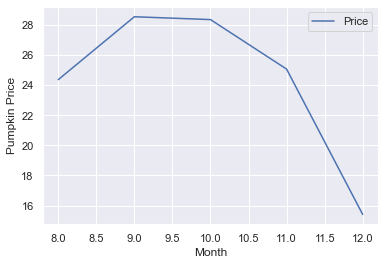

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure()
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='line')
plt.ylabel('Pumpkin Price')
plt.legend()
plt.show()

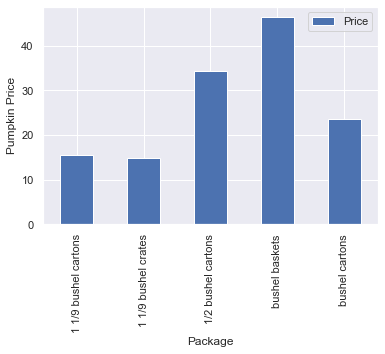

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure()
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')
plt.legend()
plt.show()

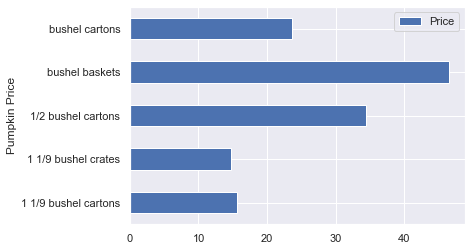

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure()
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='barh')
plt.ylabel('Pumpkin Price')
plt.legend()
plt.show()